In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import model_selection

In [2]:
dataset = pd.read_csv("Logistic_Iris.csv")

In [ ]:
x = dataset.iloc[:, [0,1,2,3]].values

In [ ]:
y = dataset.iloc[:, 4].values

In [5]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [7]:
Single = GaussianNB()
Single.fit(x_train, y_train)

GaussianNB()

In [8]:
# Predicted values for single Naïve Bayes Classifier:
y_pred = Single.predict(x_test)

In [11]:
Acc_Single= accuracy_score(y_test,y_pred)*100
print ("Accuracy using single Naïve Bayes Classifier: ",Acc_Single)

Accuracy using single Naïve Bayes Classifier:  100.0


In [13]:
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix -using single Naïve Bayes Classifier: \n", cm)

Confusion Matrix -using single Naïve Bayes Classifier: 
 [[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


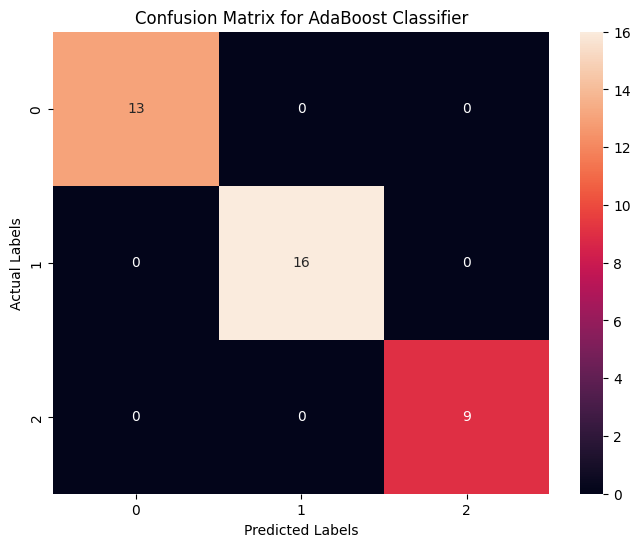

In [30]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix for AdaBoost Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [16]:
# initialize the base classifier
base_cls = GaussianNB()
# no. of base classifier
num_class = 100
# bagging classifier
Bag = BaggingClassifier(base_estimator = base_cls, n_estimators = num_class, random_state= 0)

In [18]:
Bag.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=GaussianNB(), n_estimators=100, random_state=0)

In [ ]:
results = model_selection.cross_val_score(Bag, x_test, y_test, cv = 10)

In [27]:
print("Accuracy using Bagged Set of Naïve Bayes Classifiers :", results.mean()*100)

Accuracy using Bagged Set of Naïve Bayes Classifiers : 94.16666666666667
